<a href="https://colab.research.google.com/github/LokiAndere/MIARFID-RNA-2019-20/blob/master/genface.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import keras
from keras.datasets.fashion_mnist import load_data
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers import Conv2D, DepthwiseConv2D
from keras.layers import MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D
from keras.layers import ZeroPadding2D
from keras.layers.normalization import BatchNormalization as BN
from keras.layers import GaussianNoise as GN
from keras.optimizers import SGD, Adam
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import LearningRateScheduler as LRS
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.regularizers import l2

dirPalomaPrefix = 'drive/My Drive/miarfid/data/validation/human/'
nameP = 'paloma.'
typeP = '.jpg'
dirCazadorPrefix = 'drive/My Drive/miarfid/data/test/human/'
dirTrainGenPrefix = 'drive/My Drive/miarfid/data/train/human/'
okDir = 'drive/My Drive/miarfid/train/faces/'
okDirGen = 'drive/My Drive/miarfid/train/'
trytestDir='drive/My Drive/miarfid/ggg/'

data_adress = []
for i in range (54):
  if i < 9:
    a = '0'
  else:
    a = ''
  element = dirPalomaPrefix + nameP + a + str(i+1) + typeP
  #print (f"adding {element}, type {type(element)}")
  data_adress.append(element)

lengthD = len(data_adress)
print(f"first '{data_adress[0]}', last '{data_adress[lengthD-1]}', size {lengthD}")

datagen = ImageDataGenerator(
        featurewise_center=True,
        featurewise_std_normalization=True,
        rotation_range=20,
        width_shift_range=.1,
        height_shift_range=.1,
        shear_range=.1,
        zoom_range=[1.0,1.1],
        horizontal_flip=True,
        fill_mode='nearest')

height = width = channels = 0

for i in range (lengthD):
  source_image = load_img(data_adress[i])
  transform_img = img_to_array (source_image)
  if i == 0:
    height = transform_img.shape[0]
    width = transform_img.shape[1]
    channels = transform_img.shape[2]
  #print(transform_img.shape)
  transform_img = transform_img.reshape((1,) + transform_img.shape)
  #print(transform_img.shape)
  train_data = datagen.flow(transform_img, batch_size=1, save_to_dir=trytestDir, save_prefix='paloma', save_format='jpg')
  for j in range (1):
    train_data.next()

print(f"height = {height}, width = {width}, channels = {channels}")
print(f"size = {transform_img.size}, sizepart = {transform_img[0].size}")


first 'drive/My Drive/miarfid/data/validation/human/paloma.01.jpg', last 'drive/My Drive/miarfid/data/validation/human/paloma.54.jpg', size 54


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


height = 264, width = 212, channels = 3
size = 167904, sizepart = 167904


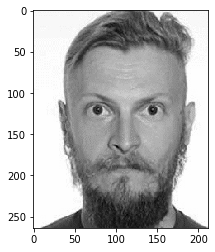

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from keras.preprocessing.image import array_to_img, img_to_array, load_img

dirPalomaPrefix = 'drive/My Drive/miarfid/data/validation/human/'
dirCazadorPrefix = 'drive/My Drive/miarfid/data/test/human/'
dirTrainGenPrefix = 'drive/My Drive/miarfid/data/train/human/'

dir = dirPalomaPrefix
x_test = []
img_data = []
j = 0

for img in os.listdir(dir):
    img_array = cv2.imread(os.path.join(dir, img), cv2.IMREAD_GRAYSCALE)
    x_test.append(img_array)
    if j == 8 :
      example = img_array;
    j+=1
    
plt.imshow(example, cmap='gray')
plt.show()

In [4]:
print(x_test)

[array([[211, 211, 211, ..., 212, 211, 211],
       [211, 211, 212, ..., 210, 212, 211],
       [211, 213, 209, ..., 212, 211, 212],
       ...,
       [202, 212, 203, ...,  94, 122, 165],
       [194, 155, 117, ...,  66,  78,  85],
       [131, 108,  84, ...,  66,  84,  84]], dtype=uint8), array([[250, 250, 250, ..., 237, 237, 238],
       [250, 250, 250, ..., 228, 238, 236],
       [250, 250, 251, ..., 237, 236, 230],
       ...,
       [193, 106,  92, ...,  93,  90,  88],
       [203, 105, 104, ...,  94,  93,  93],
       [194, 113, 105, ...,  96,  93,  97]], dtype=uint8), array([[193, 109, 161, ..., 188, 200, 200],
       [193, 118, 165, ..., 185, 204, 204],
       [195, 120, 164, ..., 187, 195, 203],
       ...,
       [194, 141, 177, ..., 211, 204, 161],
       [195, 140, 176, ..., 213, 203, 154],
       [194, 140, 172, ..., 208, 204, 154]], dtype=uint8), array([[238, 239, 238, ..., 231, 230, 222],
       [238, 237, 239, ..., 230, 222, 223],
       [238, 244, 237, ..., 230, 223, 

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


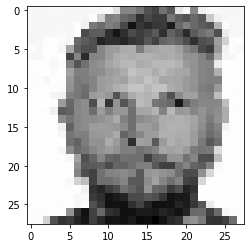

(56, 28, 28, 1)


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from keras.preprocessing.image import array_to_img, img_to_array, load_img

dirPalomaPrefix = 'drive/My Drive/miarfid/data/validation/human/'
dirCazadorPrefix = 'drive/My Drive/miarfid/data/test/human/'
dirTrainGenPrefix = 'drive/My Drive/miarfid/data/train/human/'

dir = dirPalomaPrefix
img_data = []
j = 0

for file0 in os.listdir(dir):
    img = load_img(dir + file0, grayscale=True, target_size = (28,28))
    img_array = img_to_array(img)
    if j == 0 : nparray = np.array([img_array])
    else : nparray=np.append(nparray,[img_array],axis=0)
    if j == 8 :
      example = img
    j+=1
plt.imshow(example, cmap='gray')
plt.show()
print(nparray.shape)

Found 2450 images belonging to 1 classes.
Found 4231 images belonging to 1 classes.
Found 56 images belonging to 1 classes.
Found 25 images belonging to 1 classes.
(28, 28, 1)


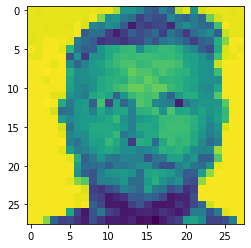

In [9]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.preprocessing.image import array_to_img, img_to_array, load_img

dirPalomaPrefix0 = 'drive/My Drive/miarfid/data/validation/'
dirCazadorPrefix0 = 'drive/My Drive/miarfid/data/test/'
dirTrainGenPrefix0 = 'drive/My Drive/miarfid/data/train/'
okDirGen = 'drive/My Drive/miarfid/ggg/data/train/'

datagen = ImageDataGenerator()

train_it = datagen.flow_from_directory(dirTrainGenPrefix0, target_size = (28,28), color_mode = "grayscale",shuffle=False,  class_mode=None, batch_size=1)
train_it2 = datagen.flow_from_directory(okDirGen, target_size = (28,28), color_mode = "grayscale",shuffle=False,  class_mode=None, batch_size=1)
val_it = datagen.flow_from_directory(dirPalomaPrefix0, target_size = (28,28), color_mode = "grayscale", class_mode=None, shuffle=False, batch_size=1)
test_it = datagen.flow_from_directory(dirCazadorPrefix0, target_size = (28,28), color_mode = "grayscale", class_mode=None,shuffle=False,  batch_size=1)

print(val_it[54][0].shape)
example = array_to_img (val_it[0][0])
plt.imshow(example)
plt.show()